# Inception Module

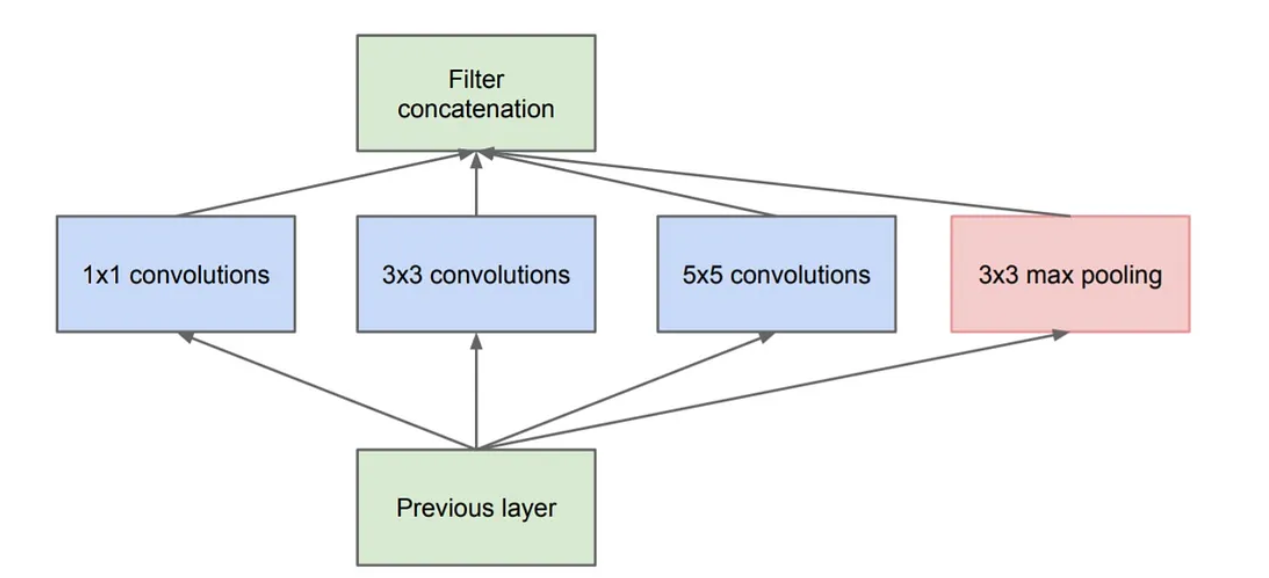

Source: https://medium.com/@abheerchrome/inception-v1-architecture-explained-454b2eb66baf

In [1]:
from tensorflow import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate


2025-06-27 20:37:48.577912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
 # 1x1 conv
 conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

 # 3x3 conv
 conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
 conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)

 # 5x5 conv
 conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
 conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)

 # 3x3 max pooling
 pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
 pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)

 # concatenate filters, assumes filters/channels last
 layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
 
 return layer_out

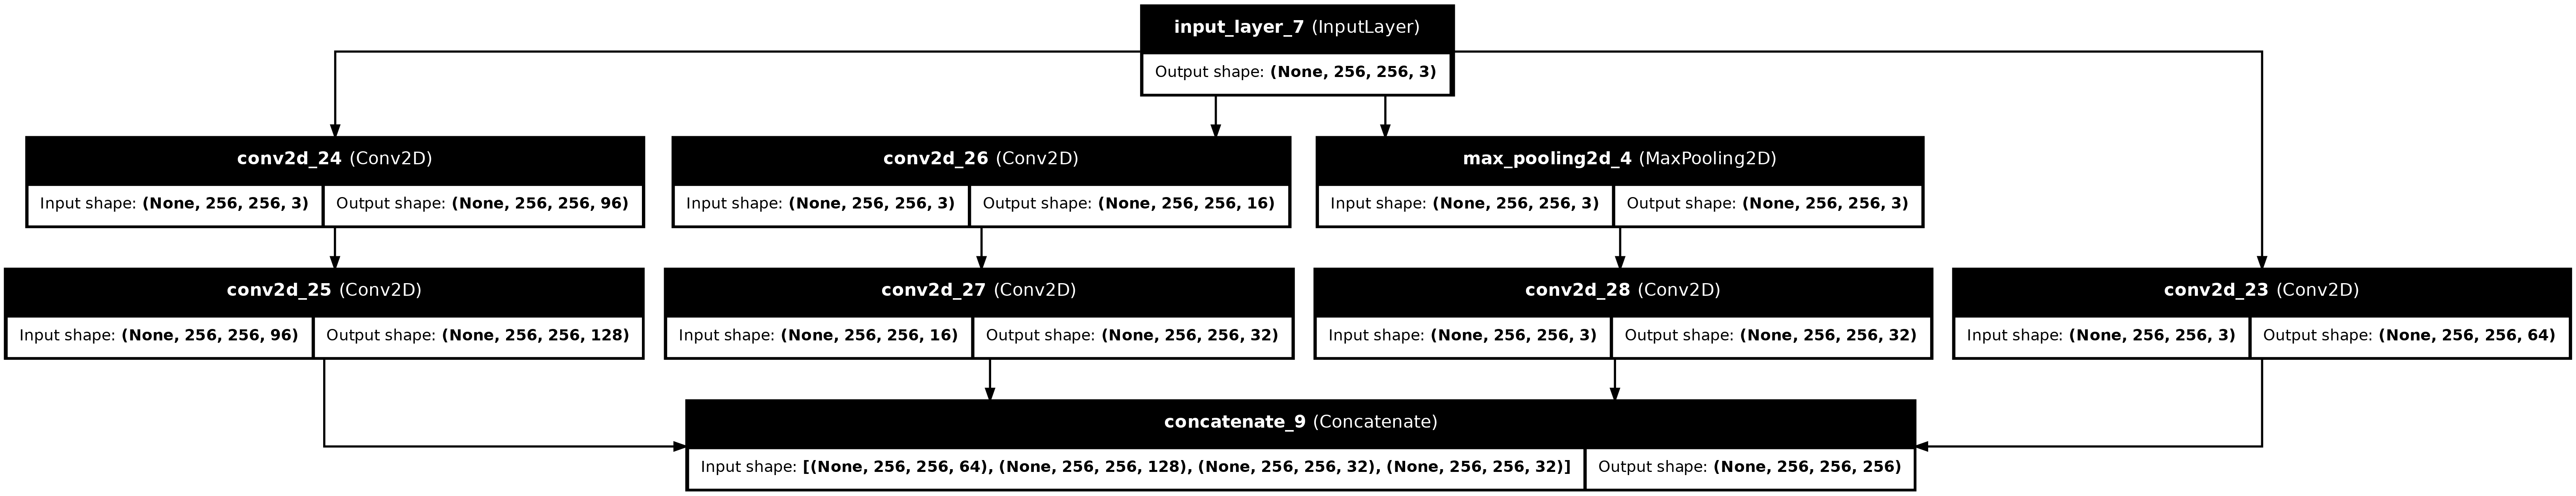

In [ ]:
# Inception module architecture 
inception_input = Input(shape=(256, 256, 3))
inception_output = inception_module(inception_input, 64, 96, 128, 16, 32, 32)
inception_model = Model(inputs=inception_input, outputs=inception_output)
tf.keras.utils.plot_model(inception_model, show_shapes=True, show_layer_names=True)

# Inception model architecture (1)

In [17]:
# Define model input
visible = Input(shape=(256, 256, 3))
# Add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# Add inception block 1
layer2 = inception_module(layer, 128, 128, 192, 32, 96, 64)
# Create model
model = Model(inputs=visible, outputs=layer2)

In [18]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 256, 256,  │        384 │ input_layer_8[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 256, 256,  │         64 │ input_layer_8[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 256, 256,  │          0 │ input_layer_8[0]… │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 256, 256,  │        256 │ input_layer_8[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 256, 256,  │    110,720 │ conv2d_30[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 256, 256,  │     12,832 │ conv2d_32[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 256, 256,  │        128 │ max_pooling2d_5[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 256, 256,  │          0 │ conv2d_29[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_31[0][0],  │
│                     │                   │            │ conv2d_33[0][0],  │
│                     │                   │            │ conv2d_34[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 256, 256,  │     32,896 │ concatenate_10[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 256, 256,  │      8,224 │ concatenate_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 256, 256,  │          0 │ concatenate_10[0… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 256, 256,  │     32,896 │ concatenate_10[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 256, 256,  │    221,376 │ conv2d_36[0][0]   │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 256, 256,  │     76,896 │ conv2d_38[0][0]   │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 256, 256,  │     16,448 │ max_pooling2d_6[… │
│                     │ 64)               │            │                 

 Total params: 513,120 (1.96 MB)

 Trainable params: 513,120 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

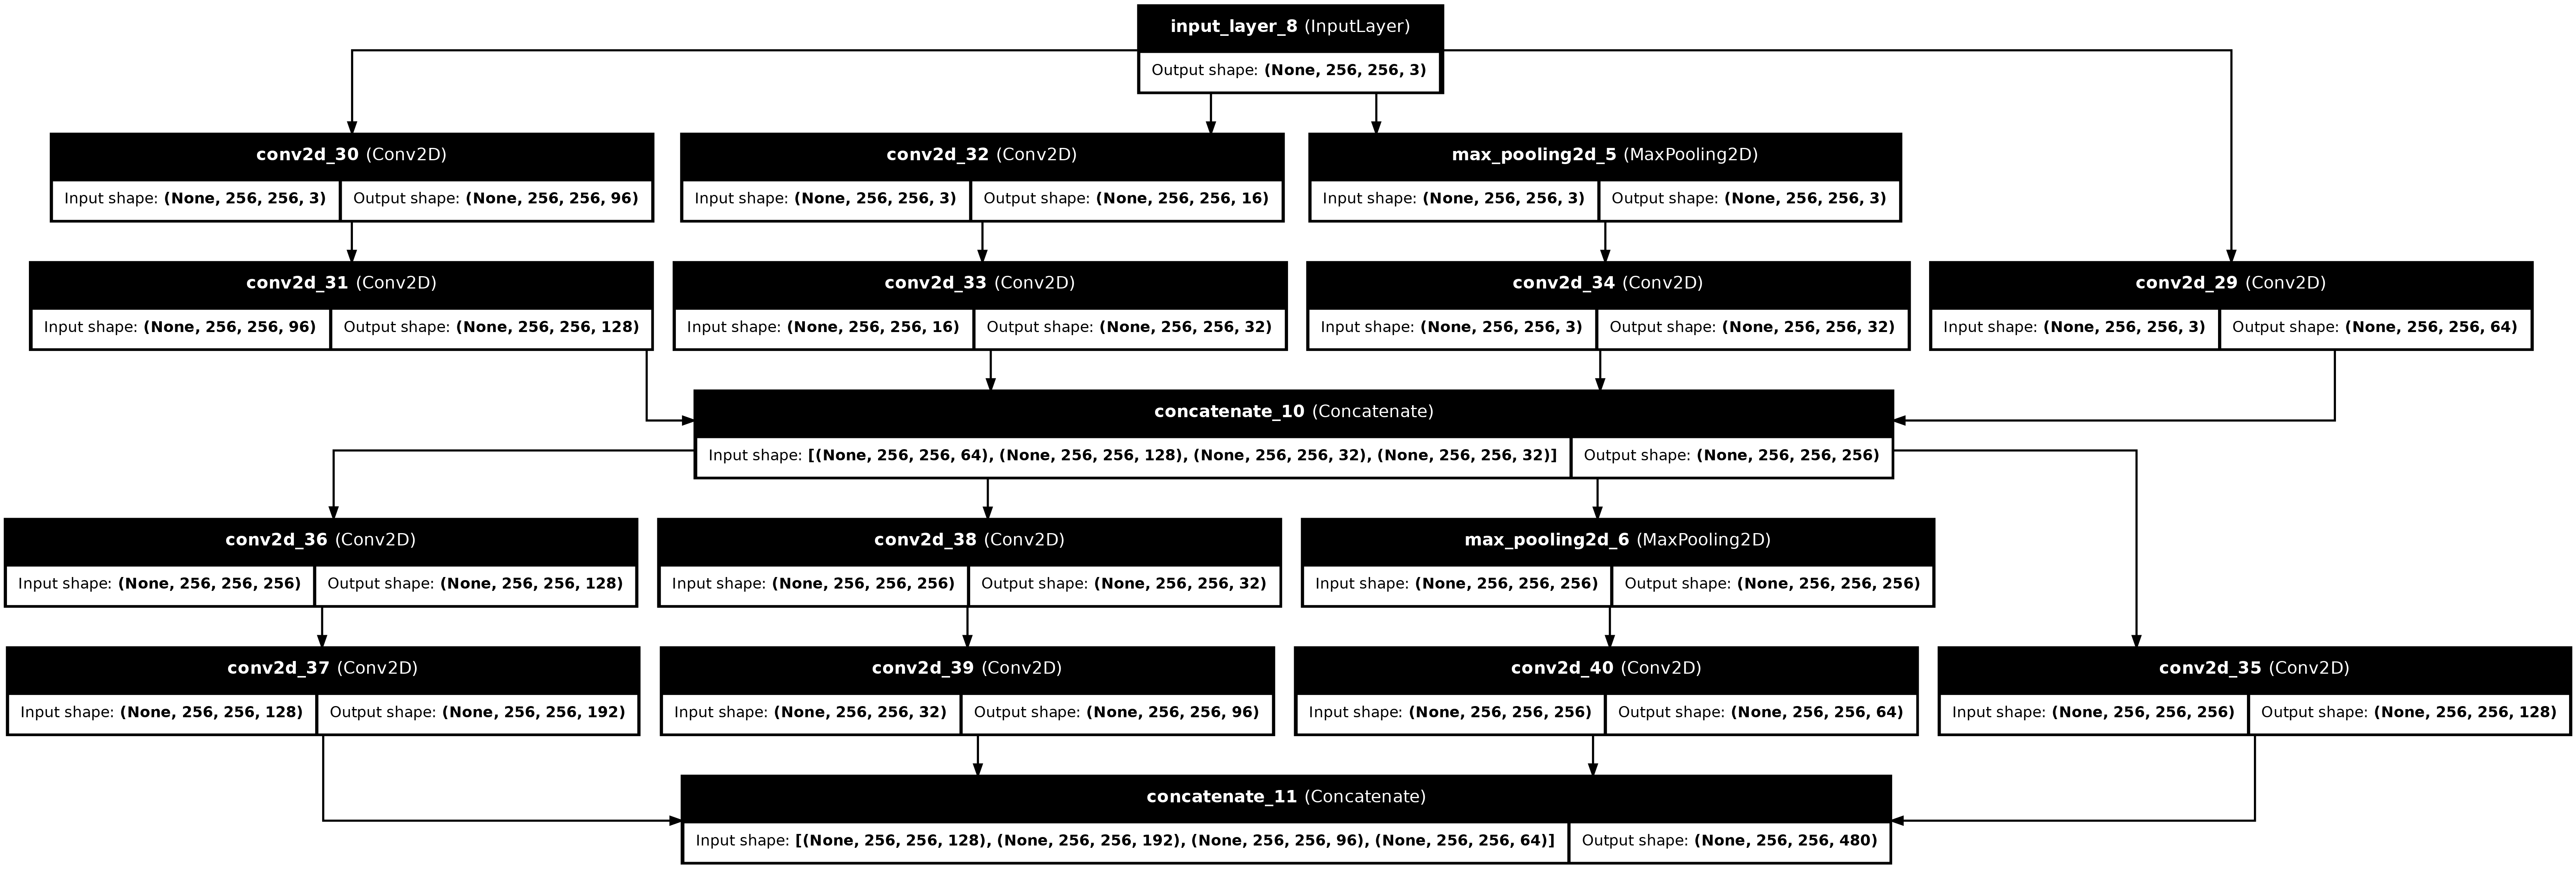

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
model.input_shape, model.output_shape

((None, 256, 256, 3), (None, 256, 256, 480))

In [9]:
model.input_shape

(None, 256, 256, 3)